<p align="center" style = "font-size:40px;"> <b>LAB 12: Edge Impulse</b> </p>



1. **Seleccionar los archivos para el dataset (ECG)**
2. **Convertirlos de txt a csv**
3. **Subirlo al Edge Impulse**

### **Proceso de pasar de txt a csv**
Primero se lee el txt y posteriormente se escribe en un archivo csv 
Los txt, se encuentran en la carpeta codigos

####  **Función para leer  txt**

In [1]:
import pandas as pd
import numpy as np
def funcion_leer(nombre):
    # Leer el archivo
    with open(nombre, 'r') as file:
        # Saltar las líneas de encabezado hasta que termine el EndOfHeader
        while True:
            line = file.readline()
            if "EndOfHeader" in line:
                break
        
        # Cargar los datos en un DataFrame
        data = pd.read_csv(file, delimiter='\t', header=None)
        
    # Seleccionar solo la quinta columna (índice 4 ya que Python empieza desde 0)
    columna_5 = data.iloc[:, 5]
    # Convertir la columna a un array de NumPy
    array_np = np.array(columna_5)
    return array_np

#### **Escribir la información a csv**

In [7]:
import csv
## Nombre de los archivos txt para convertir a csv
nombres_txt=[
    "codigos\codigos/basal/R1.txt"
    ,"codigos\codigos/basal/R2.txt"
    ,"codigos\codigos/basal/R3.txt"
    ,"codigos\codigos/ejercicio/derivada1.txt"
    ,"codigos\codigos/ejercicio/derivada2.txt"
    ,"codigos\codigos/ejercicio/derivada3.txt"
    ,"codigos\codigos/respiracion/derivada1.txt"
    ,"codigos\codigos/respiracion/derivada2.txt"
    ,"codigos\codigos/respiracion/derivada3.txt"]

nombres_csv=[
    "basal1.csv",
    "basal2.csv",
    "basal3.csv",
    "ejercicio1.csv",
    "ejercicio2.csv",
    "ejercicio3.csv",
    "respiracion1.csv",
    "respiracion2.csv",
    "respiracion3.csv"
]

for i,j in zip(nombres_csv,nombres_txt):
    variable=funcion_leer(j)
    tiempo=np.arange(len(variable))
    

    nombre_archivo = i

    # Escribir los arreglos en el archivo CSV con encabezados
    with open(nombre_archivo, mode="w", newline="") as archivo_csv:
        escritor_csv = csv.writer(archivo_csv)
    
    # Escribir el encabezado
        escritor_csv.writerow(["tiempo", "variable"])
    
    # Escribir los datos de tiempo y señal en columnas
        for t, s in zip(tiempo, variable):
            escritor_csv.writerow([t, s])

print(f"Datos guardados")

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rogge\AppData\Local\Temp\ipykernel_45708\1542129528.py:4: SyntaxWarning: invalid esca

Datos guardados


In [8]:
import csv
import numpy as np
from scipy.signal import iirnotch, filtfilt

# Función para aplicar un filtro Notch
def filtro_notch(signal, fs, freq=60.0, Q=30.0):
    """
    Aplica un filtro Notch para eliminar ruido en una frecuencia específica.
    :param signal: Array con la señal de entrada
    :param fs: Frecuencia de muestreo (Hz)
    :param freq: Frecuencia a eliminar (Hz), por defecto 60 Hz
    :param Q: Factor de calidad del filtro
    :return: Señal filtrada
    """
    nyquist = 0.5 * fs
    w0 = freq / nyquist  # Frecuencia normalizada
    b, a = iirnotch(w0, Q)  # Coeficientes del filtro Notch
    return filtfilt(b, a, signal)  # Aplica el filtro en ambos sentidos

# Nombre de los archivos txt para convertir a csv
nombres_txt = [
    "codigos\\codigos/basal/R1.txt",
    "codigos\\codigos/basal/R2.txt",
    "codigos\\codigos/basal/R3.txt",
    "codigos\\codigos/ejercicio/derivada1.txt",
    "codigos\\codigos/ejercicio/derivada2.txt",
    "codigos\\codigos/ejercicio/derivada3.txt",
    "codigos\\codigos/respiracion/derivada1.txt",
    "codigos\\codigos/respiracion/derivada2.txt",
    "codigos\\codigos/respiracion/derivada3.txt"
]

nombres_csv = [
    "basal1.csv",
    "basal2.csv",
    "basal3.csv",
    "ejercicio1.csv",
    "ejercicio2.csv",
    "ejercicio3.csv",
    "respiracion1.csv",
    "respiracion2.csv",
    "respiracion3.csv"
]

# Frecuencia de muestreo (Hz)
frecuencia_muestreo = 1000  # Ajusta según tu señal

# Bucle para procesar cada archivo
for i, j in zip(nombres_csv, nombres_txt):
    # Leer la señal (implementa tu función de lectura aquí)
    variable = funcion_leer(j)  # Cambia esto por tu función que carga los datos
    
    # Aplicar filtro Notch de 60 Hz
    variable_filtrada = filtro_notch(variable, frecuencia_muestreo)
    
    # Crear un arreglo de tiempo
    tiempo = np.arange(len(variable)) / frecuencia_muestreo  # Tiempo en segundos
    
    # Nombre del archivo CSV
    nombre_archivo = i

    # Escribir los arreglos en el archivo CSV con encabezados
    with open(nombre_archivo, mode="w", newline="") as archivo_csv:
        escritor_csv = csv.writer(archivo_csv)
        
        # Escribir el encabezado
        escritor_csv.writerow(["tiempo", "variable_filtrada"])
        
        # Escribir los datos de tiempo y señal filtrada en columnas
        for t, s in zip(tiempo, variable_filtrada):
            escritor_csv.writerow([t, s])

print("Datos filtrados y guardados correctamente.")


Datos filtrados y guardados correctamente.


In [14]:
import csv
import numpy as np
from scipy.signal import iirnotch, butter, filtfilt

# Función para aplicar un filtro Notch
def filtro_notch(signal, fs, freq=60.0, Q=30.0):
    """
    Aplica un filtro Notch para eliminar ruido en una frecuencia específica.
    :param signal: Array con la señal de entrada
    :param fs: Frecuencia de muestreo (Hz)
    :param freq: Frecuencia a eliminar (Hz), por defecto 60 Hz
    :param Q: Factor de calidad del filtro
    :return: Señal filtrada
    """
    nyquist = 0.5 * fs
    w0 = freq / nyquist  # Frecuencia normalizada
    b, a = iirnotch(w0, Q)  # Coeficientes del filtro Notch
    return filtfilt(b, a, signal)  # Aplica el filtro en ambos sentidos

# Función para aplicar un filtro paso banda
def filtro_paso_banda(signal, fs, lowcut=0.5, highcut=100.0, order=4):
    """
    Aplica un filtro paso banda a una señal.
    :param signal: Array con la señal de entrada
    :param fs: Frecuencia de muestreo (Hz)
    :param lowcut: Frecuencia mínima del filtro paso banda (Hz)
    :param highcut: Frecuencia máxima del filtro paso banda (Hz)
    :param order: Orden del filtro
    :return: Señal filtrada
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')  # Coeficientes del filtro
    return filtfilt(b, a, signal)  # Aplica el filtro en ambos sentidos

# Nombres de los archivos txt para convertir a csv
nombres_txt = [
    "codigos\\codigos/basal/R1.txt",
    "codigos\\codigos/basal/R2.txt",
    "codigos\\codigos/basal/R3.txt",
    "codigos\\codigos/ejercicio/derivada1.txt",
    "codigos\\codigos/ejercicio/derivada2.txt",
    "codigos\\codigos/ejercicio/derivada3.txt",
    "codigos\\codigos/respiracion/derivada1.txt",
    "codigos\\codigos/respiracion/derivada2.txt",
    "codigos\\codigos/respiracion/derivada3.txt"
]

nombres_csv = [
    "basal1.csv",
    "basal2.csv",
    "basal3.csv",
    "ejercicio1.csv",
    "ejercicio2.csv",
    "ejercicio3.csv",
    "respiracion1.csv",
    "respiracion2.csv",
    "respiracion3.csv"
]

# Frecuencia de muestreo (Hz)
frecuencia_muestreo = 1000  # Ajusta según tu señal

# Bucle para procesar cada archivo
for i, j in zip(nombres_csv, nombres_txt):
    # Leer la señal (implementa tu función de lectura aquí)
    variable = funcion_leer(j)  # Cambia esto por tu función que carga los datos
    
    # Aplicar filtro Notch de 60 Hz
    variable_notch = filtro_notch(variable, frecuencia_muestreo)
    
    # Aplicar filtro paso banda (0.5 Hz a 100 Hz)
    variable_filtrada = filtro_paso_banda(variable_notch, frecuencia_muestreo)
    
    # Crear un arreglo de tiempo
    tiempo = np.arange(len(variable)) / frecuencia_muestreo  # Tiempo en segundos
    
    # Nombre del archivo CSV
    nombre_archivo = i

    # Escribir los arreglos en el archivo CSV con encabezados
    with open(nombre_archivo, mode="w", newline="") as archivo_csv:
        escritor_csv = csv.writer(archivo_csv)
        
        # Escribir el encabezado
        escritor_csv.writerow(["tiempo", "variable_filtrada"])
        
        # Escribir los datos de tiempo y señal filtrada en columnas (2 decimales)
        for t, s in zip(tiempo, variable_filtrada):
            escritor_csv.writerow([f"{t:.2f}", f"{s:.2f}"])

print("Datos filtrados (Notch y Paso Banda) y guardados correctamente.")


Datos filtrados (Notch y Paso Banda) y guardados correctamente.


Gráfico guardado como señal_filtrada.png


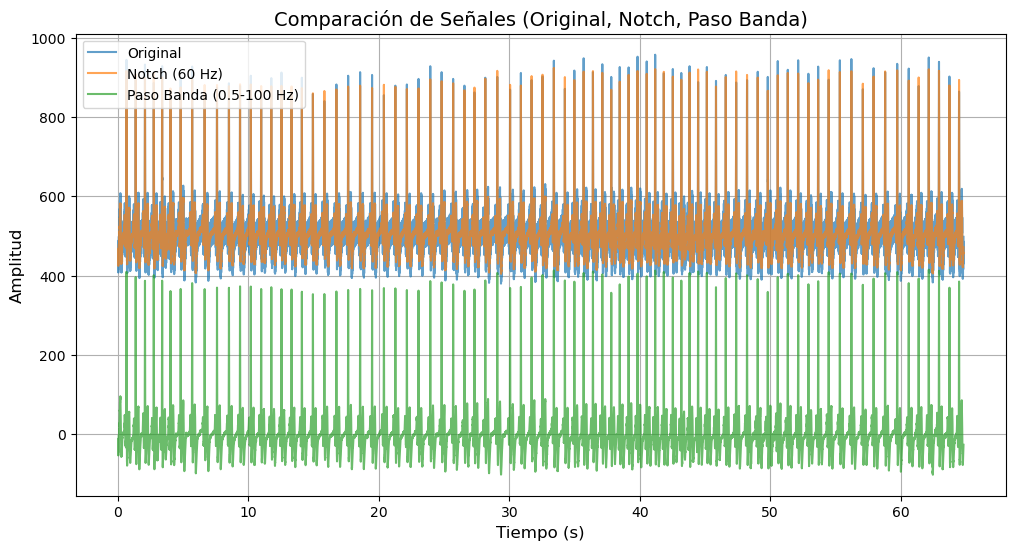

### **Edge impulse**

 - **Crear nuevo proyecto**  

<div align = "center">
<img src="Imagenes/1.png" alt="Imagen de incio" width="900" />
</div>

 - **Especificaciones del nuevo proyecto**
     - Nombre del proyecto 
     - Personal
     - Publico   

<div align = "center">
<img src="Imagenes/2.png" alt="Imagen de incio" width="400" />
</div>

- **Subir las señales**
    - Ir a data adquisition
    - CSV wizard
    - Seleccionar el formato para los archivos a usar

<h4> Pasos para configurar el CSV wizard </h4>
<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/4.png" alt="Imagen 4" style ="width :450px;margin-right:10px;" > 
    <img src= "imagenes/5.png" alt="Imagen 5" style ="width :450px;">
    
</div>


#### Seleccionado el archivo, para darle el formato que leera el Edge Impulse

<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/6.png" alt="Imagen 4" style ="width :300px;margin-right:10px;" > 
    <img src= "imagenes/7.png" alt="Imagen 5" style ="width :500px;">
    
</div>

#### Seleccionado los parametros para la configuración
  - Revisarlo los parametros adecuados para que nos quede la informacion que se desea trabajar en la tabla, en este caso como se aprecia las encabezados tiempo y variable se ajustaron para que aparezca como encabezado 
  - Estamos trabajano con ECG, entonces es una serie de data en el tiempo 

<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/8.png" alt="Imagen 4" style ="width :400px;margin-right:10px;" > 
    <img src= "imagenes/9.png" alt="Imagen 5" style ="width :500px;">
    
</div>

- En este caso tenemos la el encabezado tiempo para poderlo justarlo a esa etiqueta en función de tiempo

<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/10.png" alt="Imagen 4" style ="width :500px;margin-right:10px;" > 
 
    
</div>

-  Seleccionamos los parametros como se ve en la imagenes, para tener una correcta lectura por departe de Edge Impulse

<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/11a.png" alt="Imagen 11a " style ="width :800px;margin-right:10px;" > 
    <img src= "imagenes/11b.png" alt ="Imagen 11b " style="width : 400px;">
    
</div>

-  Para este caso si se desea poner un limite para seccionar la señal le pones el limite a trabajar, para el ejemplo esta de 5000 ms (5 segundos)

<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/12.png" alt="Imagen 12 " style ="width :500px;margin-right:10px;" > 
    
</div>

- Se termina con el proceso de CSV Wizard
- Se continua con subir el o los archivos a trabajar
<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/13.png" alt="Imagen 11a " style ="width :800px;margin-right:10px;" > 
    <img src= "imagenes/14.png" alt ="Imagen 11b " style="width : 400px;">
    
</div>





- Se tiene en cuenta los siguientes parametros 
    - Select indivual files para el caso de archivos
    - Automaticamente se pone en testing o training 
    - Label, para terner la etiqueta de la tipo de señal 
    - Notificación de Job completed, si se subio correctamente el o los archivos
<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/15.png" alt="Imagen 11a " style ="width :400px;margin-right:10px;" > 
    <img src= "imagenes/16.png" alt ="Imagen 11b " style="width : 400px;">
    
</div>

- Ir moviendo algunas data al testing para tener 80 % training y 20 % testing aproximadamente
<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/17.png" alt="Imagen 11a " style ="width :800px;margin-right:10px;" > 
    
</div>

- Eliminar la data que no cumple con los requisitos, por ejemplo las señales deben durar 5s y en ese caso dura 980 ms 
<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/18.png" alt="Imagen 11a " style ="width :800px;margin-right:10px;" > 
    
</div>

- Habra señales que seran desconocidas, ponerles otra etiqueta o eliminarlas para que no afecte al training  o testing 

<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/19.png" alt="Imagen 11a " style ="width :800px;margin-right:10px;" > 
    
</div>

**EJEMPLO DE COMO DEBE QUEDAR**
- 80 % TRAINING
- 20 % TESTING

Se recomienda que se tenga la mayor cantidad de training data para mejor el entrenamiento, y tambien es recomendable tener valores cercanos a 80/20 de training/testing
<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/20.png" alt="Imagen 11a " style ="width :600px;margin-right:10px;" > 
    
</div>

- Verificación del training/testing para todas las etiquetas

Se observa que los valores estan cerca 80% training y 20% testing

Cumple con los requisitos 
<div style="display:flex; justify-content: center;align-itms: center;">
    <img src= "imagenes/21.png" alt="Imagen 11a " style ="width :600px;margin-right:10px;" > 
    
</div>